In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from category_encoders import TargetEncoder
%matplotlib inline
plt.rcParams['figure.figsize'] = [13, 8]

In [5]:
data = pd.read_csv('/home/alena/Tasks/Course/train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'].describe()

/tmp/ipykernel_457375/242271848.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['datetime'].describe()


count                   10886
unique                  10886
top       2011-01-01 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

In [8]:
data.loc[:, 'day'] = data['datetime'].dt.day
data.loc[:, 'month'] = data['datetime'].dt.month
data.loc[:, 'year'] = data['datetime'].dt.year
data.loc[:, 'hour'] = data['datetime'].dt.hour
data.loc[:, 'dayofweek'] = data['datetime'].dt.dayofweek
data.loc[:, 'weekend'] = np.where(data['dayofweek'].isin([5,6]),1,0)

In [9]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,dayofweek,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,19,2,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012,20,2,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012,21,2,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012,22,2,0


<AxesSubplot:>

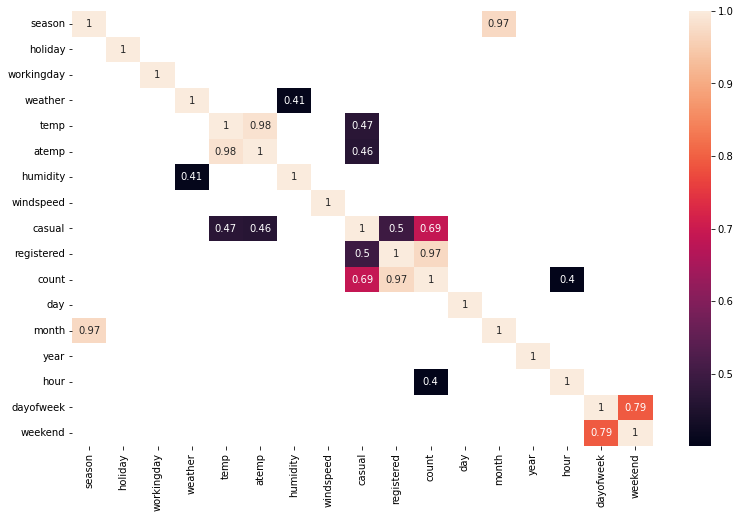

In [10]:
plt.rcParams['figure.figsize'] = [13, 8]
sns.heatmap(data.corr()[data.corr() > 0.4], annot=True)

In [11]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'dayofweek', 'weekend'],
      dtype='object')

Destributions of non-date features

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


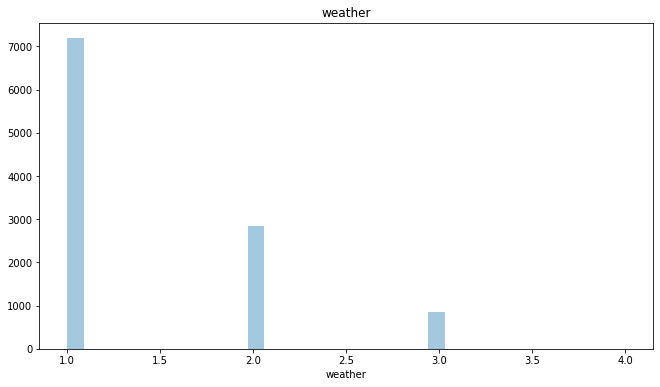

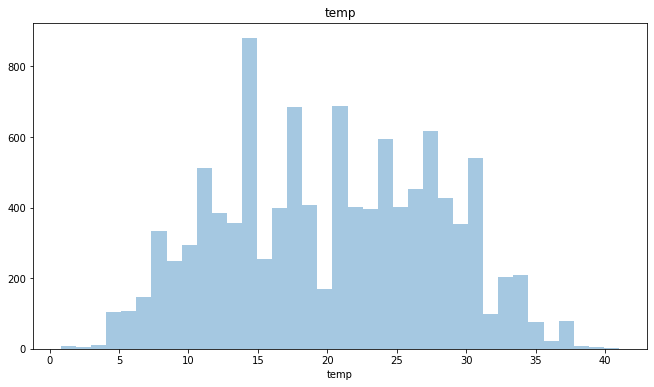

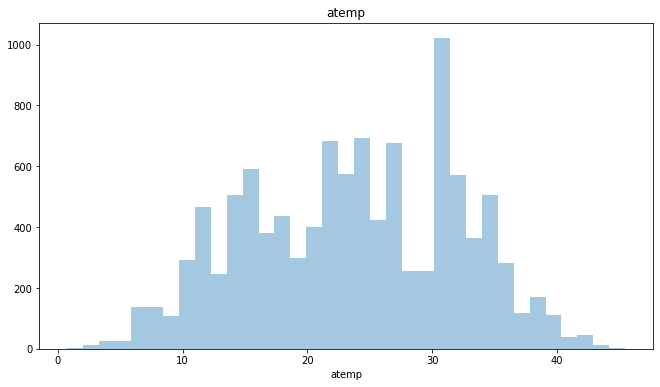

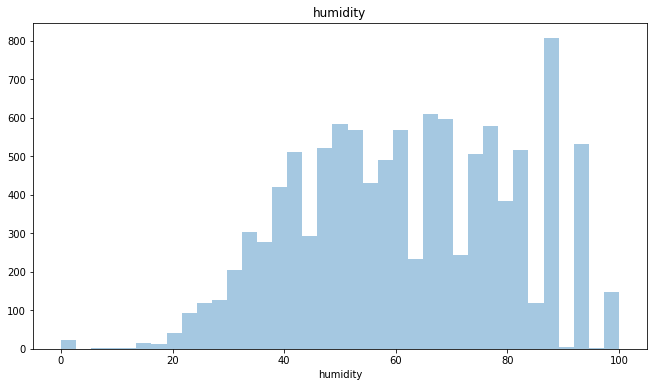

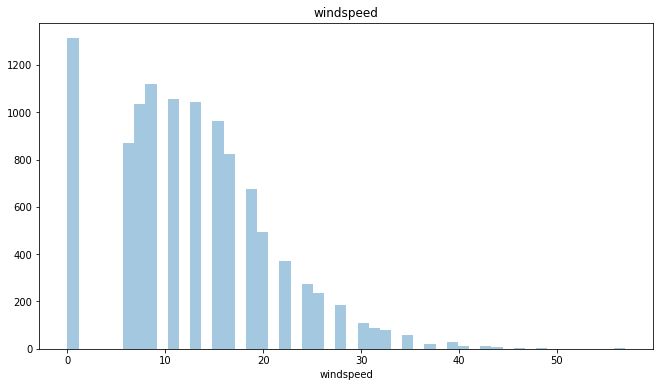

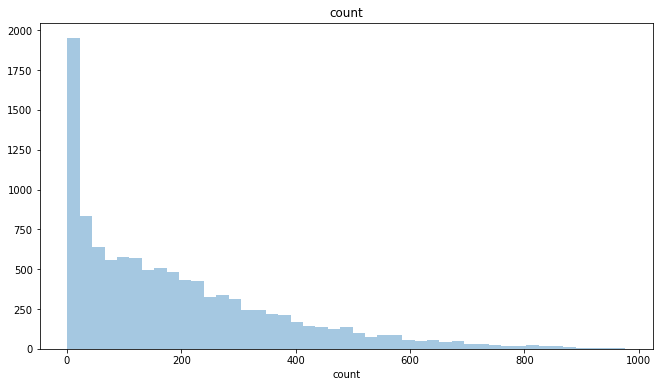

In [12]:
columns = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.rcParams['figure.figsize'] = [11, 6]
for column in columns:
    sns.distplot(a=data[column], hist=True, kde=False, rug=False)
    plt.title(column)
    plt.show()

In [13]:
data.loc[:, 'good_weather'] = data['weather'].map(lambda x: x == 1).astype(int)

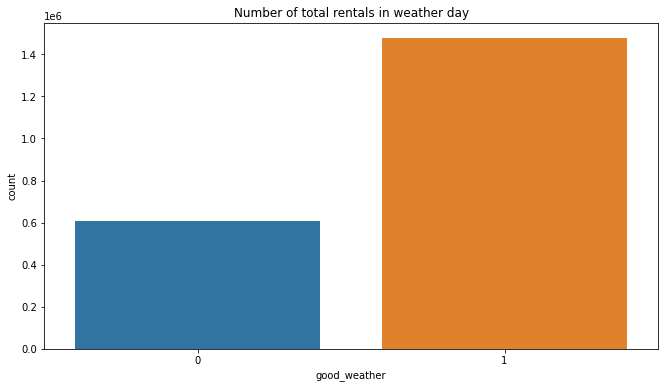

In [14]:
sns.barplot(x='good_weather', y='count', data=data, estimator=sum, ci=None);
plt.title('Number of total rentals in weather day')
plt.show()

Count destributions of date features 

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


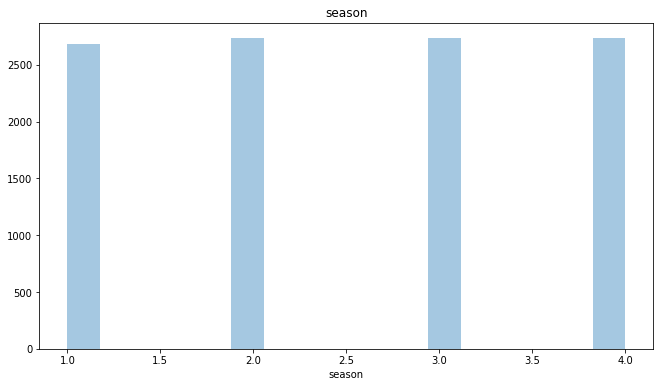

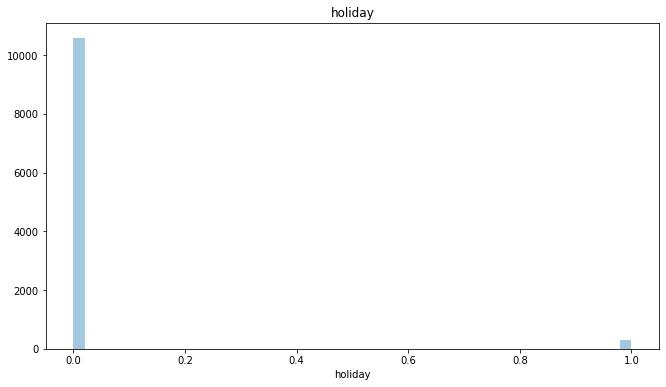

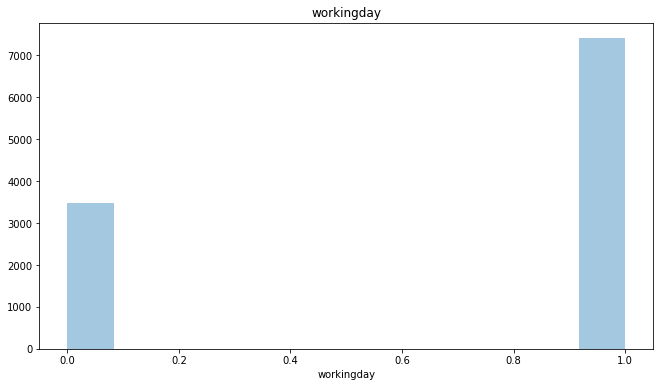

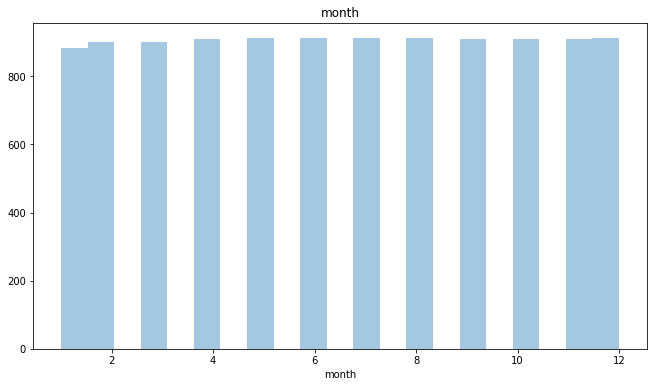

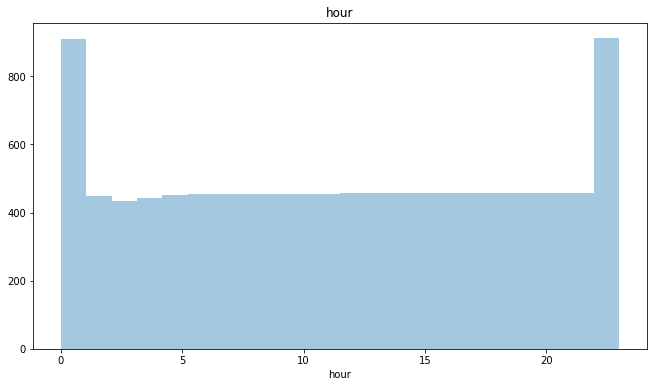

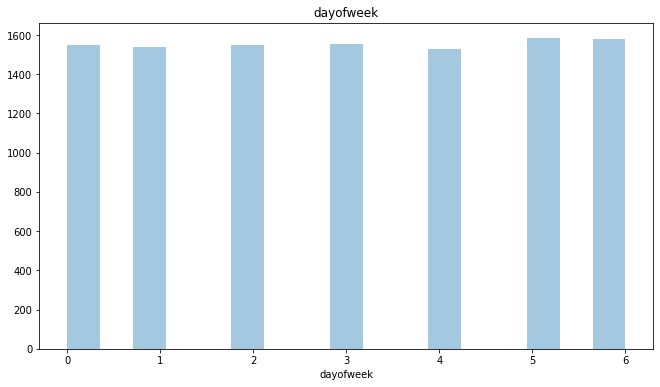

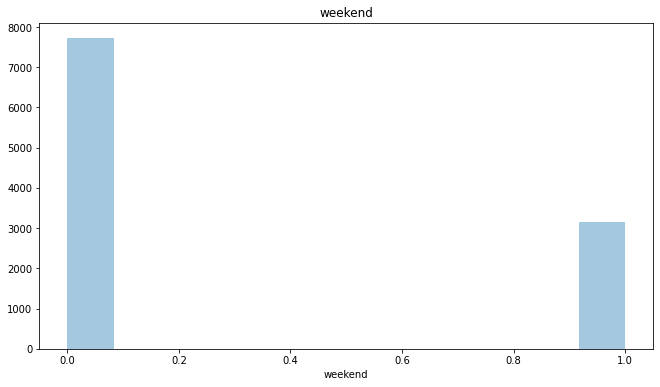

In [15]:
columns = ['season', 'holiday', 'workingday', 'month', 'hour', 'dayofweek', 'weekend']

for column in columns:
    sns.distplot(a=data[column], hist=True, kde=False, rug=False )
    plt.title(column)
    plt.show()

Season's desctribution per Count feature

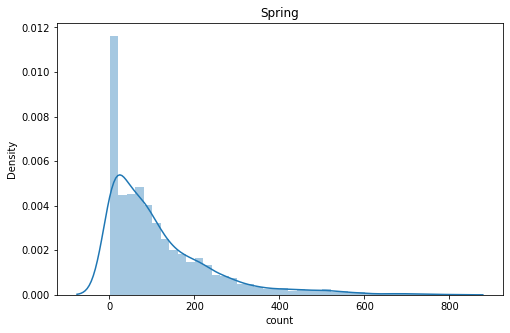

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


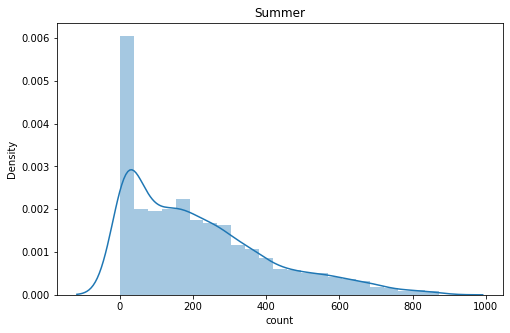

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


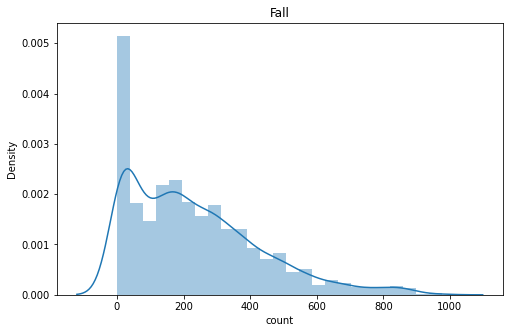

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


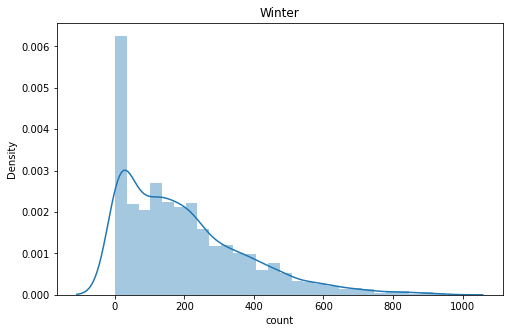

In [16]:
season_dict = {1: 'Spring',
               2: 'Summer',
               3: 'Fall',
               4: 'Winter'}
plt.rcParams['figure.figsize'] = [8, 5]
for season in data['season'].unique():
    sns.distplot(a=data[data['season'] == season]['count'], hist=True, rug=False, label=season_dict[season])
    plt.title(season_dict[season])
    plt.show()
#plt.legend()

Holiday's desctributions per Count feature

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


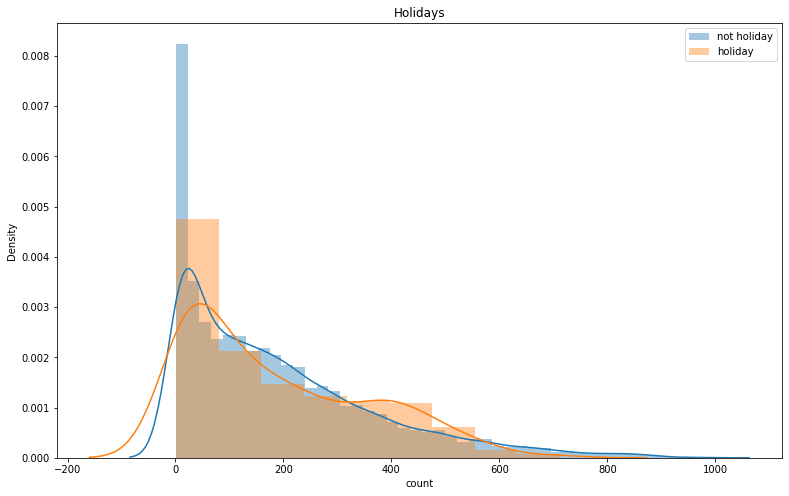

In [17]:
plt.rcParams['figure.figsize'] = [13, 8]
sns.distplot(a=data[data['holiday'] == 0]['count'], hist=True, rug=False, label='not holiday')
sns.distplot(a=data[data['holiday'] == 1]['count'], hist=True, rug=False, label='holiday')
plt.title('Holidays')
plt.legend()
plt.show()

Workingday's desctributions per Count feature

/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alena/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


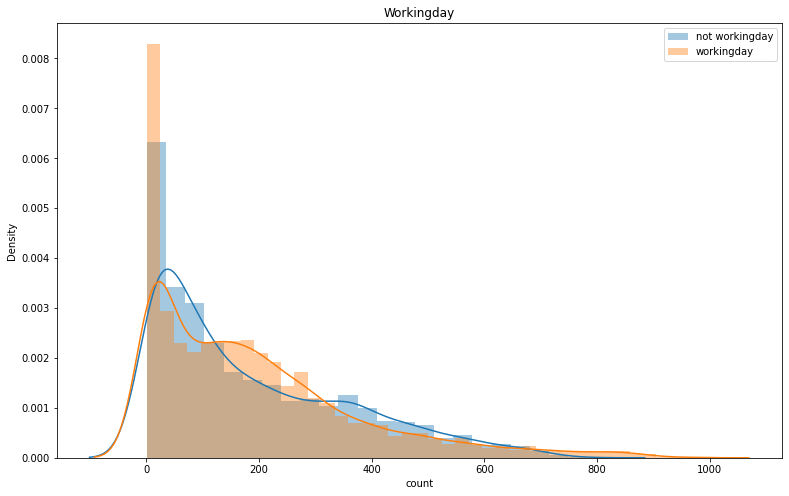

In [18]:
plt.rcParams['figure.figsize'] = [13, 8]
sns.distplot(a=data[data['workingday'] == 0]['count'], hist=True, rug=False, label='not workingday')
sns.distplot(a=data[data['workingday'] == 1]['count'], hist=True, rug=False, label='workingday')
plt.title('Workingday')
plt.legend()
plt.show()

In [19]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'dayofweek', 'weekend', 'good_weather'],
      dtype='object')

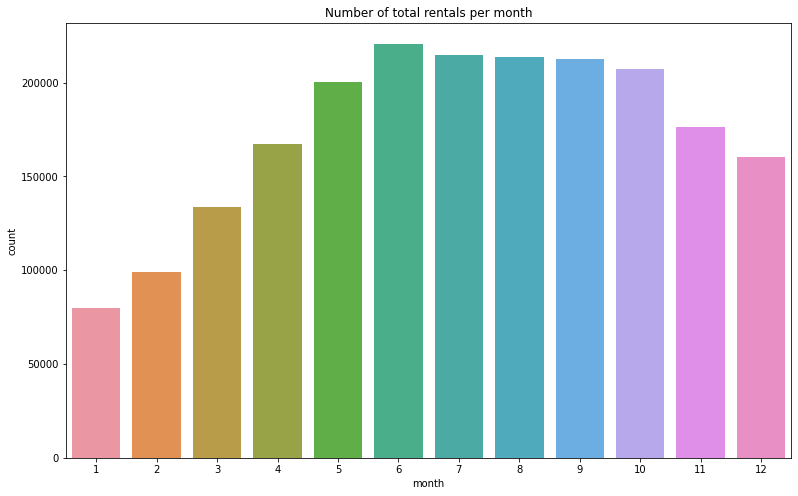

In [20]:
sns.barplot(x='month', y='count', data=data, estimator=sum, ci=None);
plt.title('Number of total rentals per month')
plt.show()

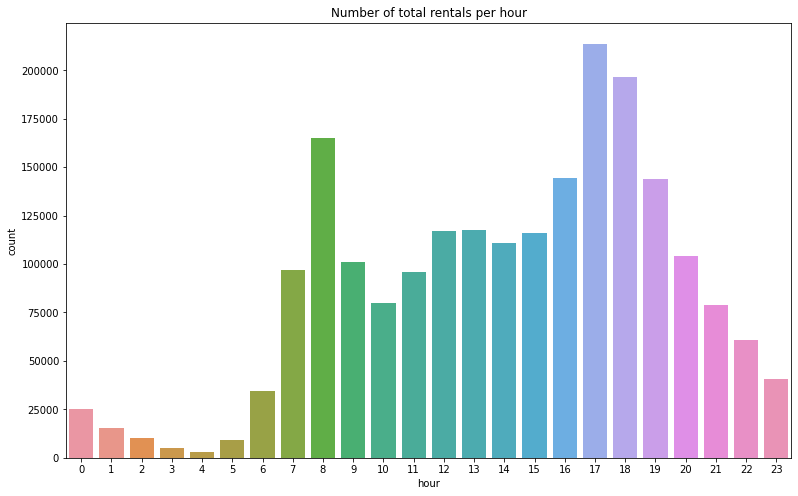

In [21]:
sns.barplot(x='hour', y='count', data=data, estimator=sum, ci=None);
plt.title('Number of total rentals per hour')
plt.show()

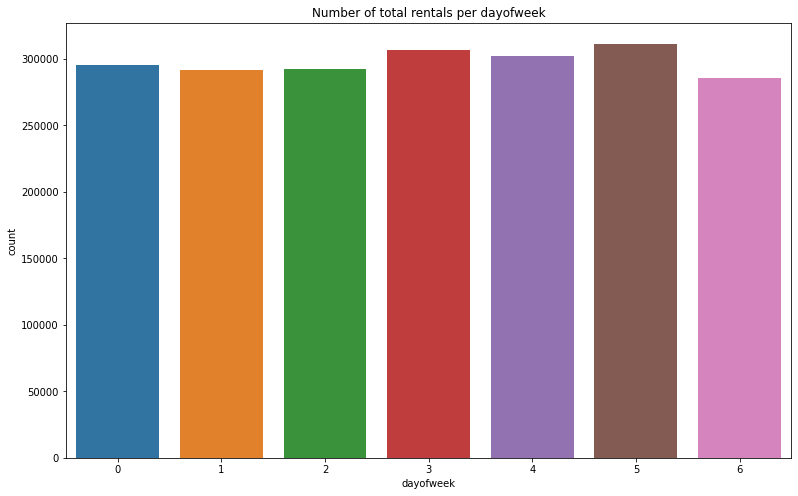

In [22]:
sns.barplot(x='dayofweek', y='count', data=data, estimator=sum, ci=None);
plt.title('Number of total rentals per dayofweek')
plt.show()

In [23]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'dayofweek', 'weekend', 'good_weather'],
      dtype='object')

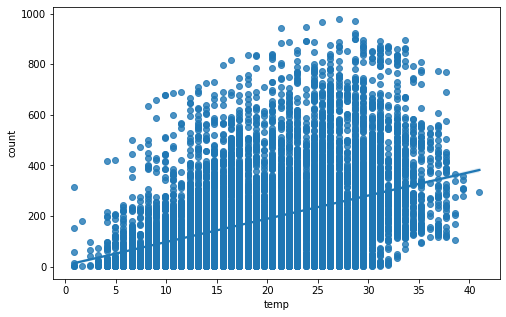

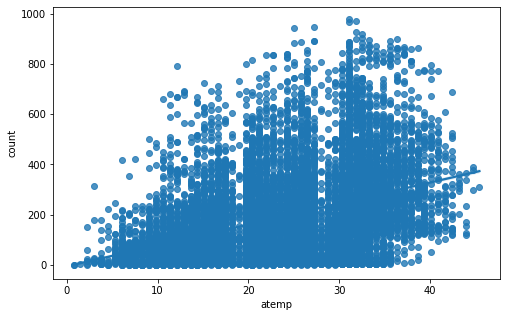

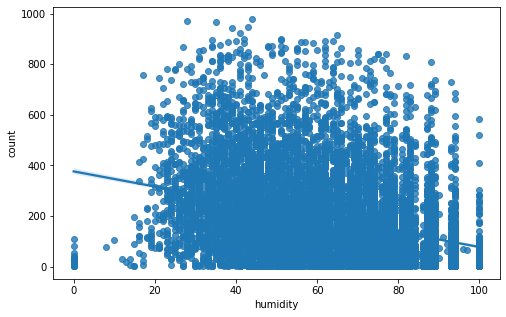

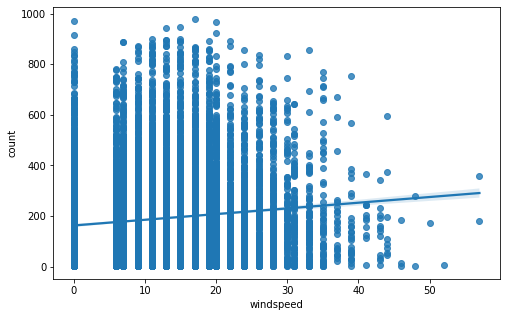

In [24]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.regplot(x=data['temp'], y=data['count'])
plt.show()
sns.regplot(x=data['atemp'], y=data['count'])
plt.show()
sns.regplot(x=data['humidity'], y=data['count'])
plt.show()
sns.regplot(x=data['windspeed'], y=data['count'])
plt.show()

In [25]:
data[(data.holiday == 1) & (data.workingday == 0)][['holiday', 'workingday', 'weekend']].head(60)

,holiday,workingday,weekend
372,1,0,0
373,1,0,0
374,1,0,0
375,1,0,0
376,1,0,0
377,1,0,0
378,1,0,0
379,1,0,0
380,1,0,0
381,1,0,0


In [26]:
data[(data.holiday == 0) & (data.workingday == 0)][['holiday', 'workingday', 'weekend']]

,holiday,workingday,weekend
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
10809,0,0,1
10810,0,0,1
10811,0,0,1
10812,0,0,1


In [27]:
data[(data.holiday == 0) & (data.workingday == 0)]['weekend'].sum()

3163

In [28]:
data[(data.holiday == 1) & (data.workingday == 0)][['datetime', 'holiday', 'workingday', 'weekend', 'dayofweek']].head(60)

,datetime,holiday,workingday,weekend,dayofweek
372,2011-01-17 00:00:00,1,0,0,0
373,2011-01-17 01:00:00,1,0,0,0
374,2011-01-17 02:00:00,1,0,0,0
375,2011-01-17 03:00:00,1,0,0,0
376,2011-01-17 04:00:00,1,0,0,0
377,2011-01-17 05:00:00,1,0,0,0
378,2011-01-17 06:00:00,1,0,0,0
379,2011-01-17 07:00:00,1,0,0,0
380,2011-01-17 08:00:00,1,0,0,0
381,2011-01-17 09:00:00,1,0,0,0


In [29]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'dayofweek', 'weekend', 'good_weather'],
      dtype='object')

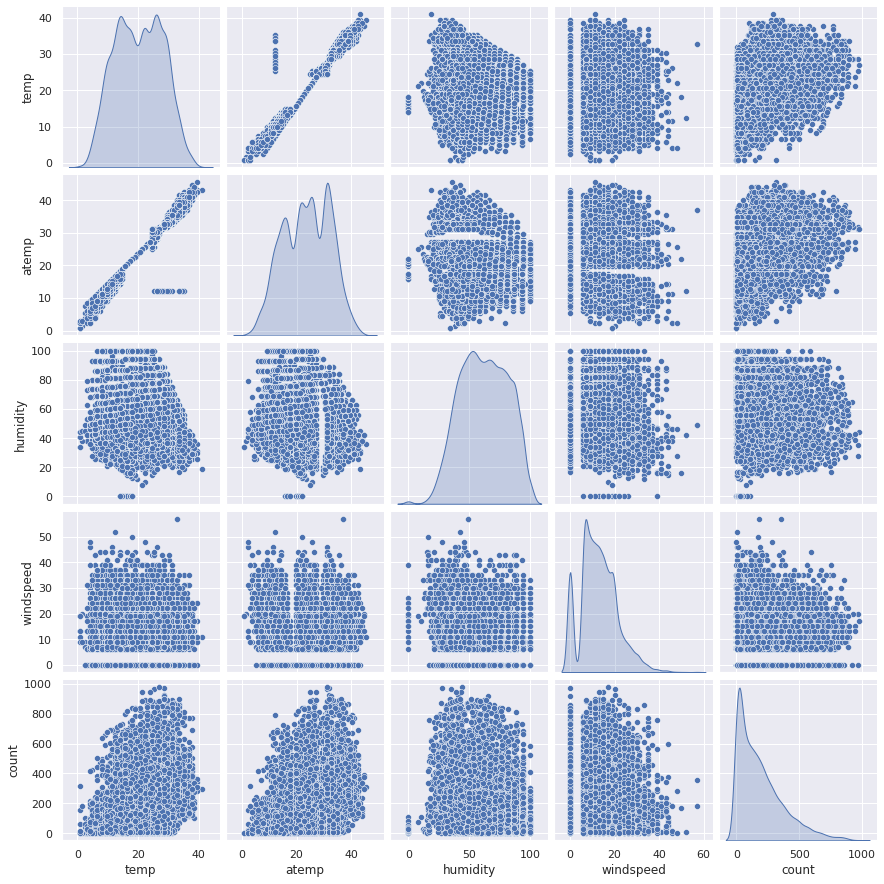

In [30]:
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(data[columns], diag_kind='kde')

Text(0.5, 1.0, 'Counts for all period')

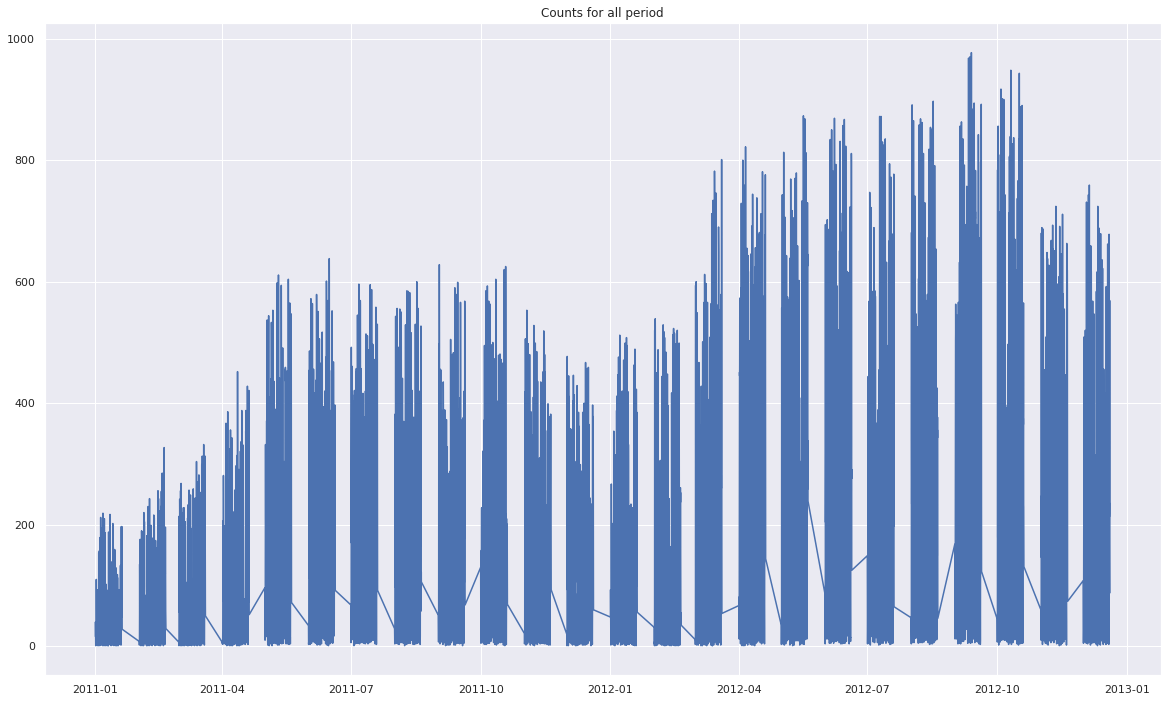

In [31]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.plot(data['datetime'], data['count'])
plt.title('Counts for all period')

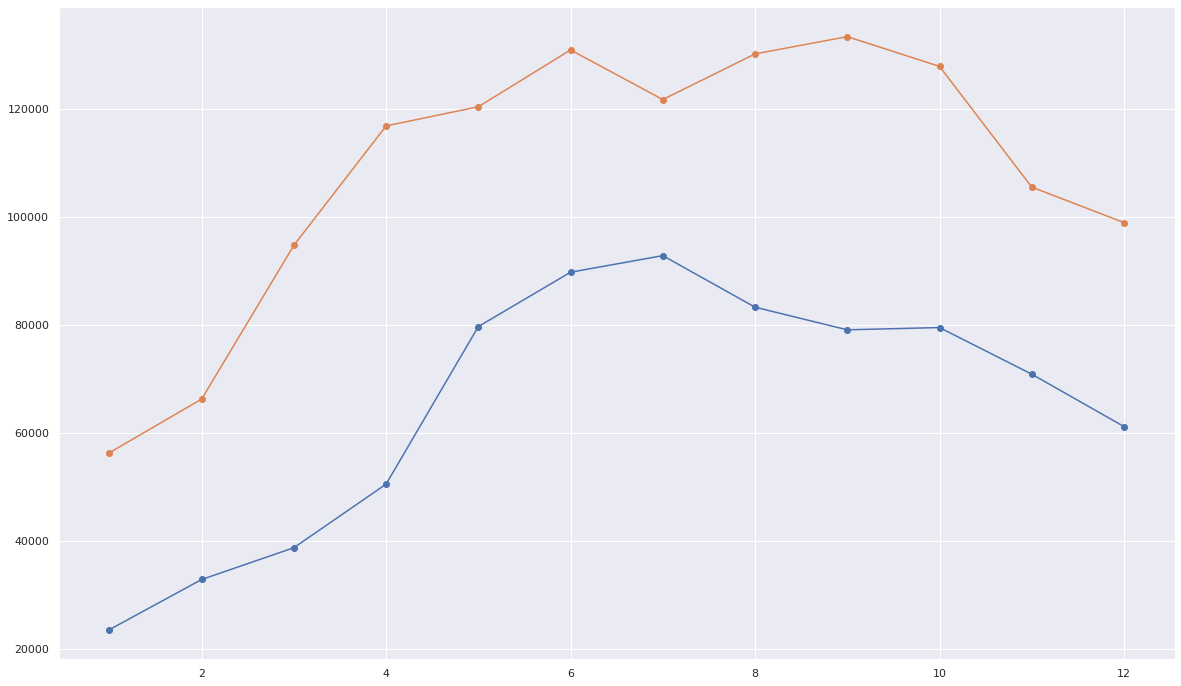

In [32]:
plt.rcParams['figure.figsize'] = [20, 12]
grouped = data[['month', 'year', 'count']].groupby(['month', 'year'], as_index=False)['count'].sum()
plt.plot(grouped[grouped['year'] == 2011]['month'], grouped[grouped['year'] == 2011]['count'], marker='o', label='2011')
plt.plot(grouped[grouped['year'] == 2012]['month'], grouped[grouped['year'] == 2012]['count'], marker='o', label='2012')

In [33]:
columns = ['temp', 'atemp', 'humidity', 'windspeed']

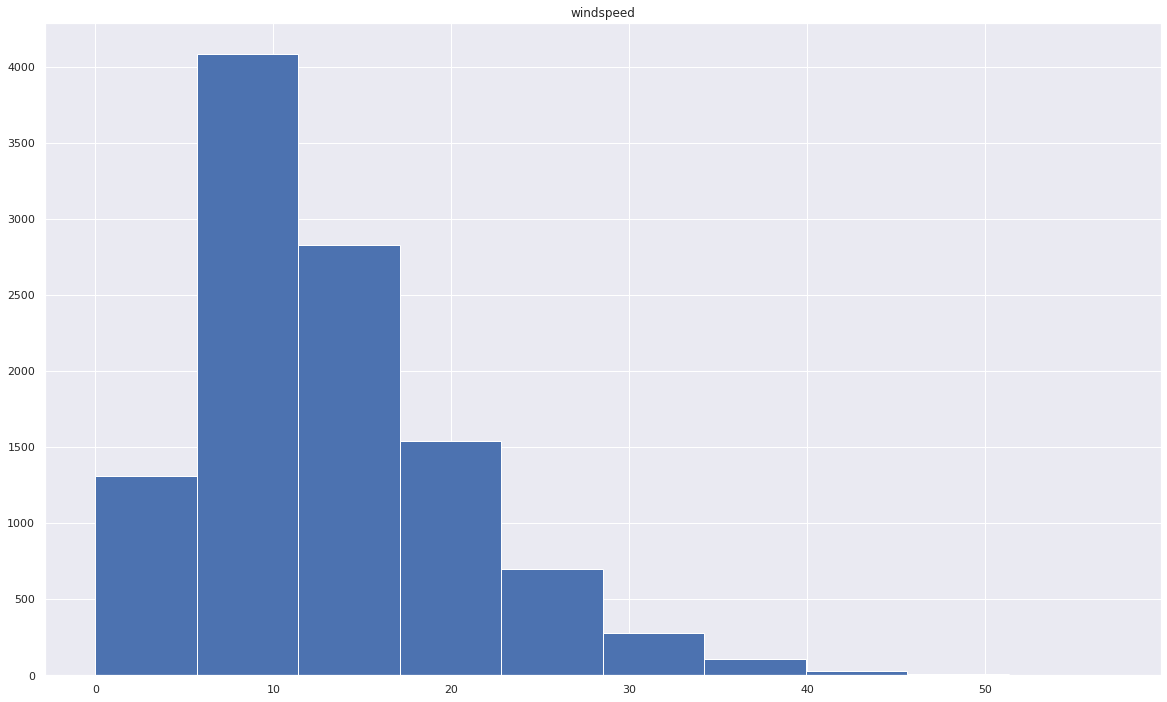

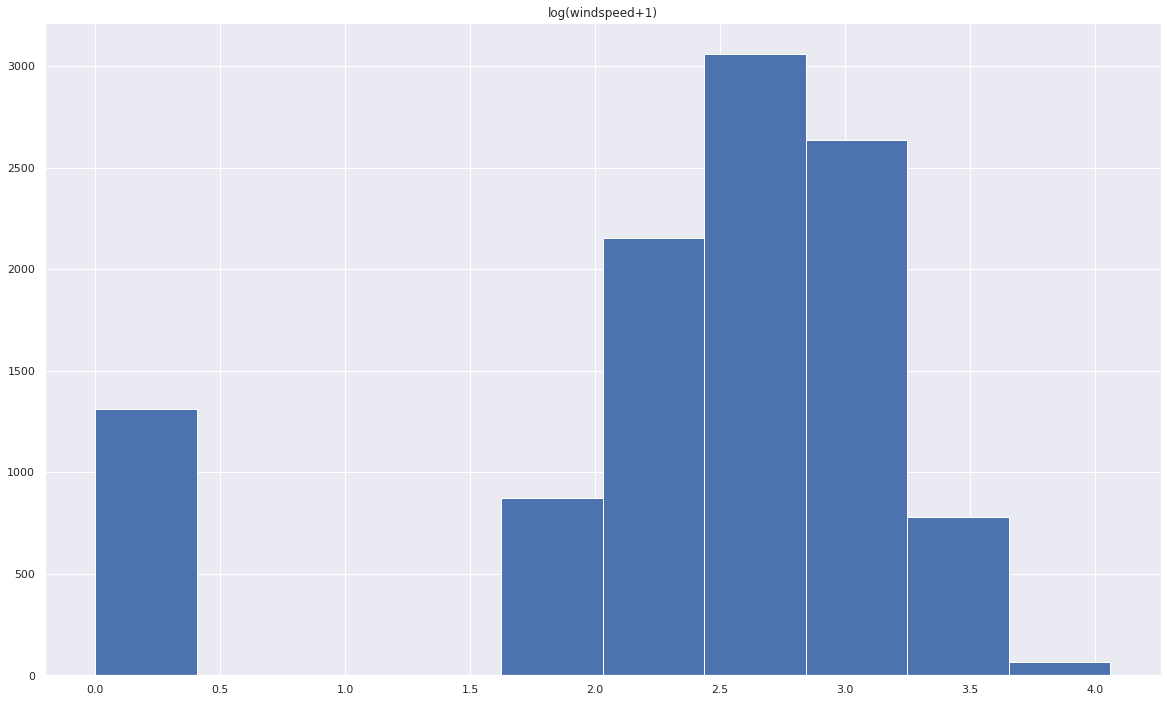

(10886, 1)


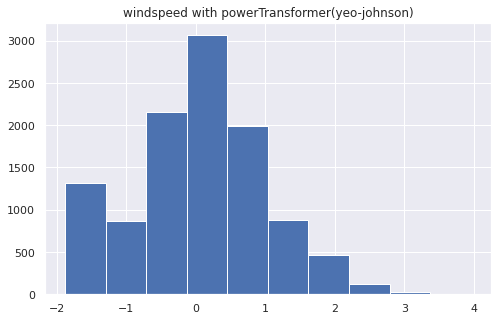

(10886, 1)


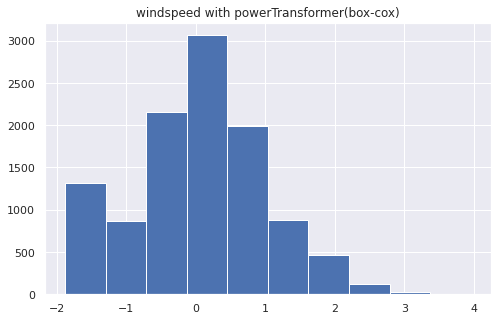

In [34]:
column = 'windspeed'
data[column].hist()
plt.title(column)
plt.show()

np.log(data[column]+1).hist()
plt.title(f'log({column}+1)')
plt.show()

transformer = PowerTransformer(method='yeo-johnson')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform(data[column].values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(yeo-johnson)')
plt.show()

transformer = PowerTransformer(method='box-cox')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform((data[column]+1).values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(box-cox)')
plt.show()

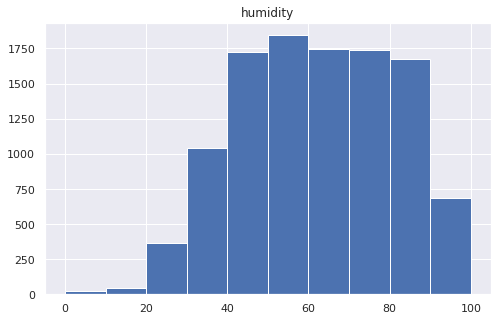

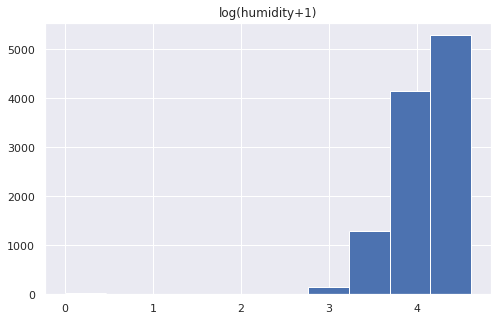

(10886, 1)


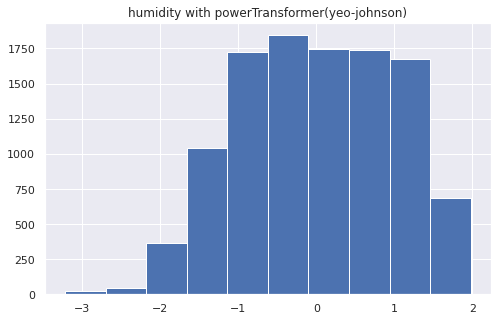

(10886, 1)


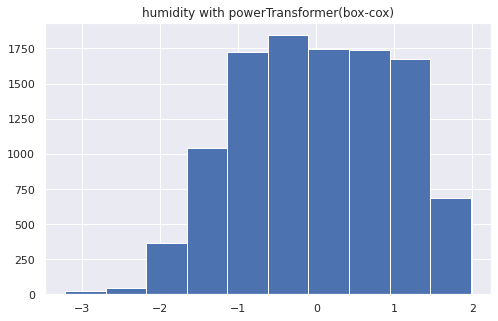

In [35]:
column = 'humidity'
data[column].hist()
plt.title(column)
plt.show()

np.log(data[column]+1).hist()
plt.title(f'log({column}+1)')
plt.show()

transformer = PowerTransformer(method='yeo-johnson')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform(data[column].values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(yeo-johnson)')
plt.show()

transformer = PowerTransformer(method='box-cox')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform((data[column]+1).values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(box-cox)')
plt.show()

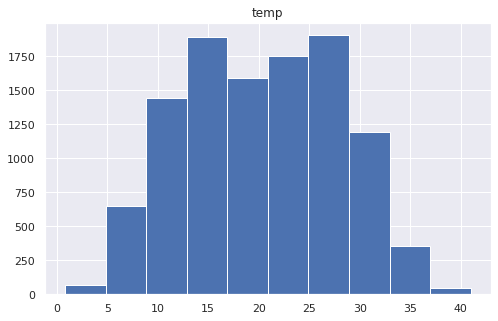

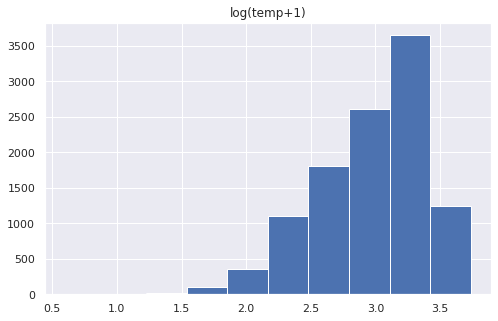

(10886, 1)


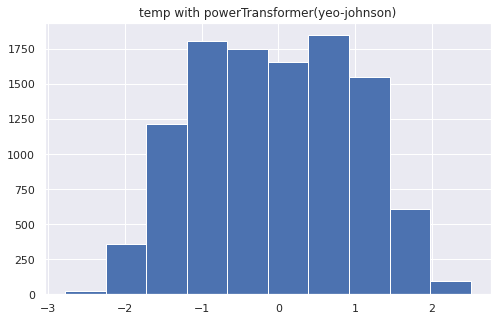

(10886, 1)


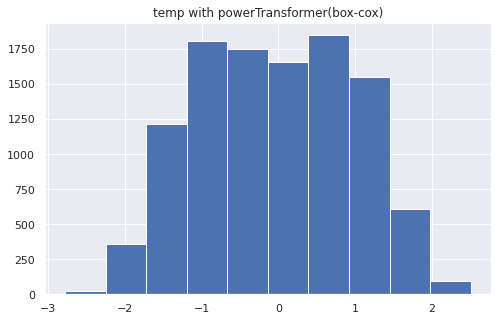

In [36]:
column = 'temp'
data[column].hist()
plt.title(column)
plt.show()

np.log(data[column]+1).hist()
plt.title(f'log({column}+1)')
plt.show()

transformer = PowerTransformer(method='yeo-johnson')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform(data[column].values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(yeo-johnson)')
plt.show()

transformer = PowerTransformer(method='box-cox')
plt.rcParams['figure.figsize'] = [8, 5]
res = transformer.fit_transform((data[column]+1).values.reshape(-1, 1))
print(res.shape)
plt.hist(res)
plt.title(f'{column} with powerTransformer(box-cox)')
plt.show()

In [38]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'year', 'hour', 'dayofweek', 'weekend', 'good_weather'],
      dtype='object')

In [39]:
transformer = PowerTransformer()
data['windspeed'] = transformer.fit_transform(data['windspeed'].values.reshape(-1, 1))

In [40]:
['season', 'holiday', 'workingday',
       'month', 'year', 'hour', 'dayofweek', 'weekend', 'good_weather']

['season',
 'holiday',
 'workingday',
 'month',
 'year',
 'hour',
 'dayofweek',
 'weekend',
 'good_weather']

In [41]:
cat_columns = ['season', 'holiday', 'workingday',
       'month', 'dayofweek', 'weekend', 'good_weather']

encoder = TargetEncoder(cols=cat_columns)
encoded_columns = [f'{column}_encoded' for column in cat_columns]
data[encoded_columns] = encoder.fit_transform(data[cat_columns], data['count'])

In [42]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,dayofweek,weekend,good_weather,season_encoded,holiday_encoded,workingday_encoded,month_encoded,dayofweek_encoded,weekend_encoded,good_weather_encoded
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,-1.883830,3,...,5,1,1,116.343261,191.741655,188.506621,90.366516,196.665404,188.765096,205.236791
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,-1.883830,8,...,5,1,1,116.343261,191.741655,188.506621,90.366516,196.665404,188.765096,205.236791
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,-1.883830,5,...,5,1,1,116.343261,191.741655,188.506621,90.366516,196.665404,188.765096,205.236791
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,-1.883830,3,...,5,1,1,116.343261,191.741655,188.506621,90.366516,196.665404,188.765096,205.236791
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,-1.883830,0,...,5,1,1,116.343261,191.741655,188.506621,90.366516,196.665404,188.765096,205.236791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,1.470884,7,...,2,0,1,198.988296,191.741655,193.011873,175.614035,188.411348,192.724589,205.236791
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,0.364721,10,...,2,0,1,198.988296,191.741655,193.011873,175.614035,188.411348,192.724589,205.236791
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,0.364721,4,...,2,0,1,198.988296,191.741655,193.011873,175.614035,188.411348,192.724589,205.236791
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,-0.761802,12,...,2,0,1,198.988296,191.741655,193.011873,175.614035,188.411348,192.724589,205.236791


In [44]:
# month hour as cos and sin